In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

diabetes = pd.read_csv("../dataset/diabetes.csv")

In [2]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.describe()    ##Statistical Summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
len(diabetes.columns)

9

In [5]:
df = diabetes

In [6]:
df.shape

(768, 9)

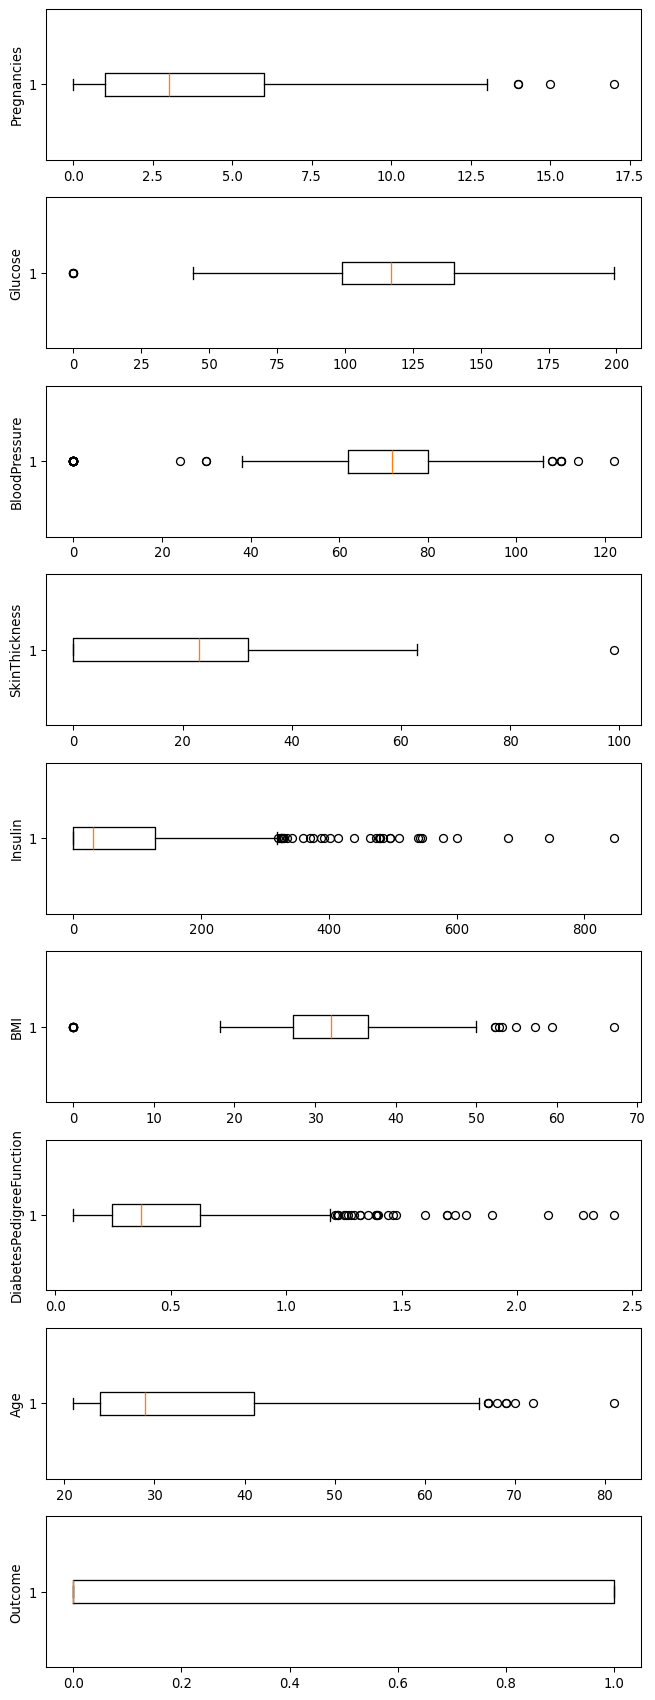

In [7]:
fig, axs = plt.subplots(len(df.columns), 1, figsize=(7, 18), dpi=95)
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()


## This plot shows how outliers, and mean

In [12]:
df.corr()   ## This shows how the variable impact on eachother

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


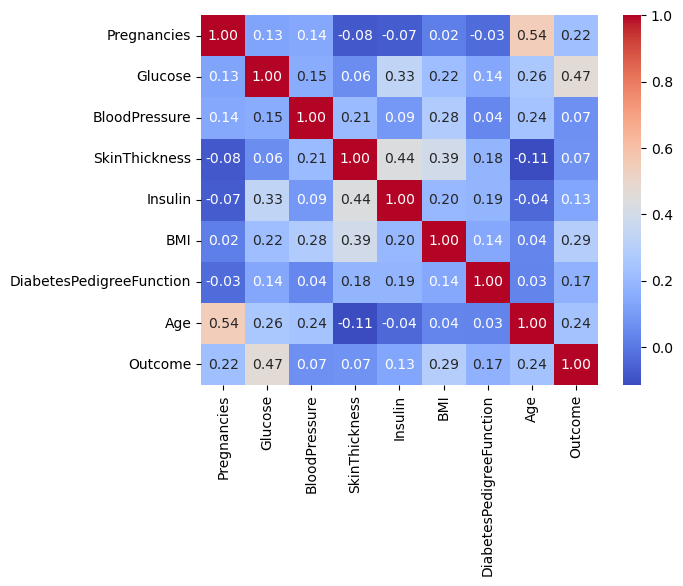

In [13]:
## Plotting the heatmap to see the corellation
corr = df.corr()
sns.heatmap(corr, annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()


In [15]:
print(corr["Outcome"].sort_values(ascending = False))

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


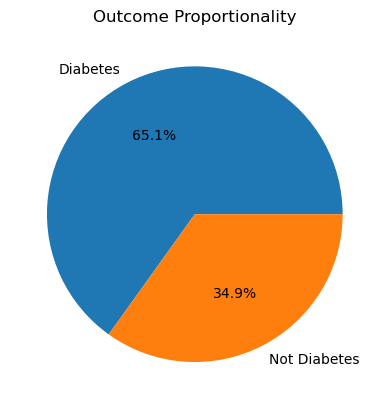

In [31]:
plt.pie(
    df["Outcome"].value_counts(),
    labels=["Diabetes", "Not Diabetes"],
    autopct="%1.1f%%"
)

plt.title("Outcome Proportionality")
plt.show()


In [32]:
x = df.drop(columns=["Outcome"])  ##Input/dependent variables
y = df["Outcome"]  ## Output/Target

In [42]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [43]:
y


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [47]:
## MIN MAX SCALER
## This rescale features btw 0 and 1. Good for KNN and NN algorithms

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)
print(x_normalized[:5])

[[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


In [46]:
## STANDARDIZATION
## Transform features to have mean=0, and SD=1. Used for distributed features

scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)
print(x_standardized[:5])

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


In [50]:
x_normalized == x_standardized

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])